In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = 10
n = 100

# simulate an nxk dataframe
df = pd.DataFrame(np.random.randn(n, k), columns=[f'x{i}' for i in range(k)])
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.420005,2.460806,-2.064547,-1.972584,-0.812805,-1.016828,-0.069410,0.696079,-0.061728,-1.244713
1,-0.612651,-0.488098,0.614794,1.537571,0.355044,0.230956,-0.511308,-0.176660,-1.030301,-1.192028
2,-0.144599,-0.943433,-0.828976,-1.183035,0.386621,-2.120620,-0.570783,-0.291187,0.643804,-0.291253
3,-1.546471,-0.462411,0.561012,-0.077056,0.203316,0.462778,-0.493288,0.104696,1.829767,-0.475358
4,-0.437093,0.921533,-1.378846,-0.364765,1.034598,0.329241,0.288209,-1.409446,-1.589089,2.479427
...,...,...,...,...,...,...,...,...,...,...
95,-0.024287,-0.516672,-0.900962,-0.309819,0.482030,0.071192,-1.804377,0.117238,0.507082,-0.392460
96,-1.566996,-0.618687,-0.201503,-1.038571,0.896984,0.188890,2.547278,0.949595,-0.089918,0.824822
97,1.413275,0.621820,0.772729,1.160297,0.830776,0.760501,-0.704623,-0.652495,-1.069727,0.290978
98,-0.670990,-1.465726,0.647383,-0.635602,-1.288267,0.784664,1.201703,-1.171550,-0.292315,0.771094


In [12]:
df_transformed = (df > 0.5).astype(int)

# Display the transformed DataFrame
df_transformed


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,1,0
96,0,0,0,0,1,0,1,1,0,1
97,1,1,1,1,1,1,0,0,0,0
98,0,0,1,0,0,1,1,0,0,1


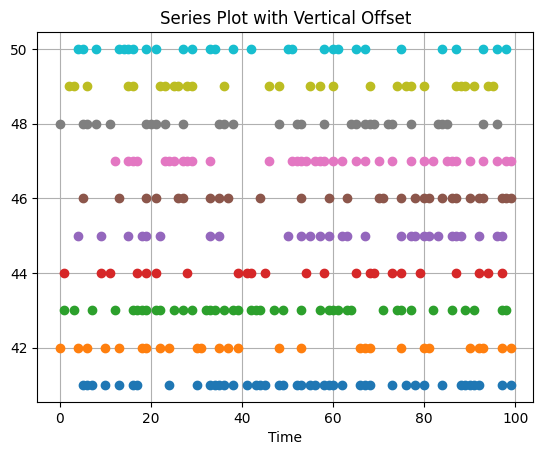

In [13]:

for i, column in enumerate(df_transformed.columns):
    # Filter to include only values where the series is 1
    filtered_series = df_transformed[df_transformed[column] == 1]
    plt.plot(filtered_series.index, filtered_series[column] + offset, marker='o', linestyle='', label=column)
    offset += 1  # Increase the offset for the next series

plt.xlabel('Time')
#
# plt.yticks(range(len(df_transformed.columns)), df_transformed.columns)  # Set y-ticks to series names
plt.title('Series Plot with Vertical Offset')
#plt.legend(title='Series')
plt.grid(True)  # Add grid for better visibility
plt.show()


In [19]:
df_transformed.corr().abs().round(1) - np.eye(k)  # Subtract the identity matrix to remove diagonal

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
x0,0.0,0.2,0.1,0.1,0.0,0.1,0.0,0.0,0.0,0.1
x1,0.2,0.0,0.2,0.0,0.2,0.3,0.1,0.0,0.1,0.1
x2,0.1,0.2,0.0,0.1,0.0,0.1,0.0,0.2,0.0,0.1
x3,0.1,0.0,0.1,0.0,0.0,0.0,0.1,0.1,0.1,0.0
x4,0.0,0.2,0.0,0.0,0.0,0.3,0.0,0.1,0.0,0.1
x5,0.1,0.3,0.1,0.0,0.3,0.0,0.0,0.0,0.2,0.2
x6,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.1,0.1,0.2
x7,0.0,0.0,0.2,0.1,0.1,0.0,0.1,0.0,0.1,0.2
x8,0.0,0.1,0.0,0.1,0.0,0.2,0.1,0.1,0.0,0.1
x9,0.1,0.1,0.1,0.0,0.1,0.2,0.2,0.2,0.1,0.0


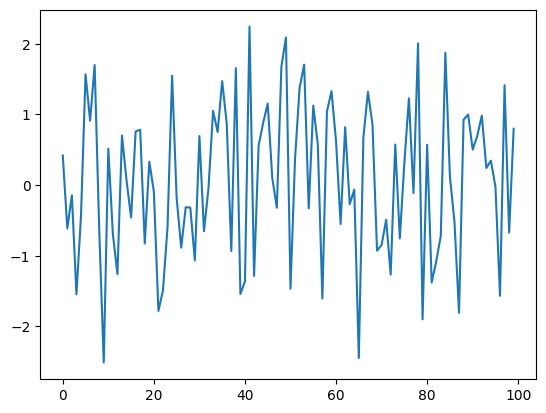

In [32]:
i, column
x = df[column]
plt.plot(x.index, x, linestyle='-', label=column)

In [58]:
def generate_dataframe(n: int, k: int, is_iid: bool=True) -> pd.DataFrame:
    """
    Generate a simulated dataframe of dimensions nxk.
    If is_iid is True, the data will be drawn from a standard normal distribution.
    If is_iid is False, the data will be drawn from a multivariate normal distribution
    with a random covariance matrix.
    """
    rng = np.random.default_rng()
    if is_iid:    
        data = rng.standard_normal((n, k))
        return pd.DataFrame(data, columns=[f'x{i}' for i in range(k)])
    else:
        mean = np.zeros(k)
        A = np.random.randn(k, k)
        covariance_matrix = np.dot(A, A.T)  # Create a random positive semi-definite covariance matrix
        data = rng.multivariate_normal(mean, covariance_matrix, n)

    df = pd.DataFrame(data, columns=[f'x{i}' for i in range(k)])
    return df
n, k = 2000, 2
A = generate_dataframe(n=n, k=k, is_iid=False)
print(A.corr())

          x0        x1
x0  1.000000 -0.792035
x1 -0.792035  1.000000


,x0,x1
count,2000.000000,2000.000000
mean,-0.020899,0.010014
std,0.989148,0.793025
min,-3.684930,-2.395447
25%,-0.691522,-0.500628
50%,-0.019550,0.023404
75%,0.624494,0.539274
max,3.108778,2.661906


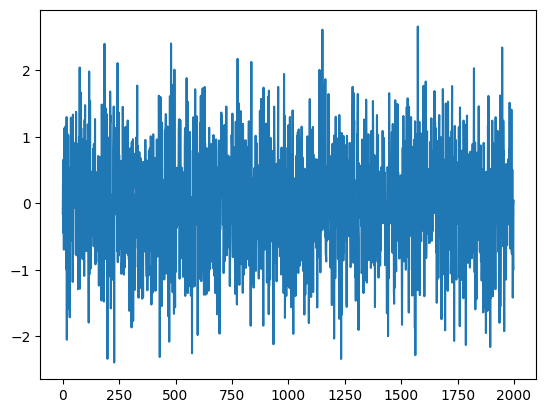

In [62]:
x0 = A['x0']
x1 = A['x1']
plt.plot(x1)
A.describe()

In [78]:
# activation function to apply to each time series
def relu(x, threshold=0):
    return np.maximum(0, x-threshold) > 0

          x0        x1
x0  1.000000  0.264554
x1  0.264554  1.000000
0 x0 2000
1 x1 2000


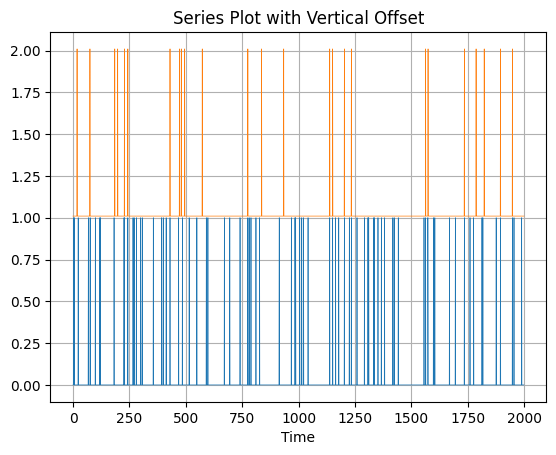

In [80]:
A_transformed = A.abs().apply(lambda x: relu(x, 2))
print(A_transformed.corr())

df = A_transformed.copy()
offset = 0
for i, column in enumerate(df.columns):
    filtered_series = df[column]
    print(i, column, len(filtered_series))
    plt.plot(filtered_series.index, filtered_series + offset, linestyle='-', label=column, linewidth=.5)
    offset += 1.01  # Increase the offset for the next series

plt.xlabel('Time')
#
# plt.yticks(range(len(df_transformed.columns)), df_transformed.columns)  # Set y-ticks to series names
plt.title('Series Plot with Vertical Offset')
#plt.legend(title='Series')
plt.grid(True)  # Add grid for better visibility
plt.show()
